<a href="https://colab.research.google.com/github/007jayesh/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

In [27]:
customer_df=pd.read_excel("/content/drive/MyDrive/Capstone unsupervised/Online Retail.xlsx")

In [28]:
# Fisrt 5 values.
customer_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [29]:
# Last 5 values.
customer_df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

In [30]:
#print the unique value
customer_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [31]:
#Looking for the description of the dataset to get insights of the data
customer_df.describe().T

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

#**Features description**
* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned
to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.
#**Preprocessing the dataset**
Why do we need to handle missing values?

* The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first

##**Missing Values**

In [ ]:
#check for count of missing values in each column.
customer_df.isna().sum()
customer_df.isnull().sum()

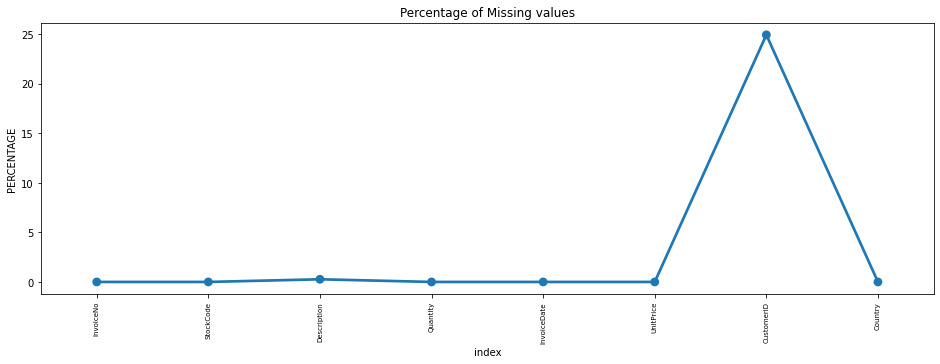

In [32]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((customer_df.isnull().sum())*100/customer_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [35]:
customer_df['Description'].isnull().sum()

1454

In [34]:
customer_df['CustomerID'].isnull().sum()

135080

* There are some null value present in our dataset like in CustomerID and Description

In [36]:
customer_df.dropna(inplace=True)

In [37]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [38]:
customer_df.shape

(406829, 8)

* After removeing null value in our dataset .it reduces to (406829, 8)

In [39]:
# Checking Duplicate Values
value=len(customer_df[customer_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  5225


In [40]:
customer_df[customer_df.duplicated()]


InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
527    2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
537    2010-12-01 11:45:00       2.95     17908.0  United Kingdom  
539    2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
555    2010-12-01 11:49:00       2.95     17920.0  United Kingdom  
...                    ...        ...         ...             ...  
541675 2011-12-09 11:34:00       0.39     14446.0  United Kingdom  
541689 2011-12-09 11:34:00       2.49     14446.0  United Kingdom  
541692 2011-12-09 11:34:00       1.95     14446.0  United Kingdom  
541699 2011-12-09 11:34:00       2.10     14446.0  United Kingdom  
541701 2011-12-09 11:34:00       2.08     14446.0  United Kingdom  

[5225 rows x 8 columns]

In [41]:
### Dropping Duplicate Rows
customer_df=customer_df.drop_duplicates()
len(customer_df[customer_df.duplicated()])

0

In [42]:
customer_df.shape

(401604, 8)

###**we have to drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation**

In [43]:
customer_df['InvoiceNo'] = customer_df['InvoiceNo'].astype('str')

In [44]:
# checking invoice no.
customer_df[customer_df['InvoiceNo'].str.contains('C')]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8872 rows x 8 columns]

In [45]:
customer_df=customer_df[~customer_df['InvoiceNo'].str.contains('C')]

In [46]:
customer_df.shape

(392732, 8)

In [47]:
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

###**convert invoice Data column into 'year','month','day','hour','minute','second'**

In [48]:
customer_df['InvoiceDate_year'] = customer_df['InvoiceDate'].dt.year
customer_df['InvoiceDate_month'] = customer_df['InvoiceDate'].dt.month
customer_df['InvoiceDate_day'] = customer_df['InvoiceDate'].dt.day
customer_df['InvoiceDate_hour'] = customer_df['InvoiceDate'].dt.hour
customer_df['InvoiceDate_minute'] = customer_df['InvoiceDate'].dt.minute
customer_df['InvoiceDate_second'] = customer_df['InvoiceDate'].dt.second

In [49]:
print("Columns and data types")
pd.DataFrame(customer_df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


dtype
InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                 float64
Country                     object
InvoiceDate_year             int64
InvoiceDate_month            int64
InvoiceDate_day              int64
InvoiceDate_hour             int64
InvoiceDate_minute           int64
InvoiceDate_second           int64

In [50]:
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

In [51]:
customer_df.shape

(392732, 14)

#**Exploratory Data Analysis**

In [52]:
# let us see the unique ids of customers
print('The no. of customers = ',customer_df['CustomerID'].nunique())

The no. of customers =  4339


So we have around 392732 rows but only 4339 customers. Let us now see who is most active customer.

In [53]:
# finding most active customer
active_customers=pd.DataFrame(customer_df['CustomerID'].value_counts().sort_values(ascending=False).reset_index())
active_customers.rename(columns={'index':'CustomerID','CustomerID':'Count'},inplace=True)
active_customers

CustomerID  Count
0        17841.0   7676
1        14911.0   5672
2        14096.0   5111
3        12748.0   4413
4        14606.0   2677
...          ...    ...
4334     16990.0      1
4335     13302.0      1
4336     13017.0      1
4337     17923.0      1
4338     13106.0      1

[4339 rows x 2 columns]

In [54]:
# top 5
active_customers.head()

CustomerID  Count
0     17841.0   7676
1     14911.0   5672
2     14096.0   5111
3     12748.0   4413
4     14606.0   2677

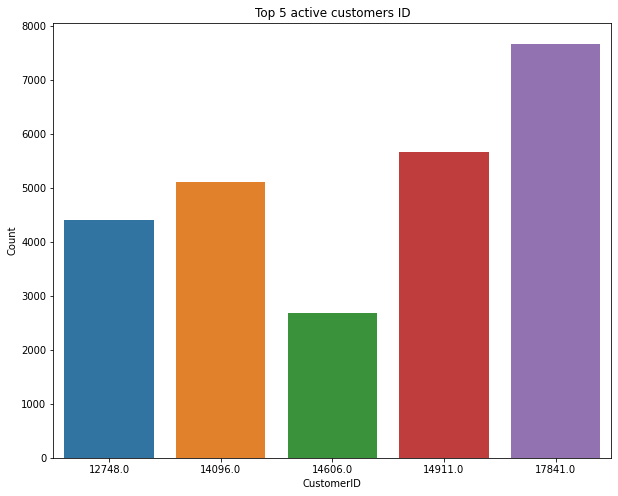

In [55]:
plt.figure(figsize=(10,8))
plt.title('Top 5 active customers ID')
sns.barplot(x='CustomerID',y='Count',data=active_customers[:5])

The top 5 most active customers that have been regularly purchasing are having ids 17841, 14911, 14096, 12748, 14606. These customers can be considered as special customeres because it is very likely that they would buy more often.

##**Analysis of Categorical Features**

In [56]:
Description_df=customer_df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)

In [57]:
Description_df.head()

Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2016
1            REGENCY CAKESTAND 3 TIER   1714
2             JUMBO BAG RED RETROSPOT   1615
3       ASSORTED COLOUR BIRD ORNAMENT   1395
4                       PARTY BUNTING   1390

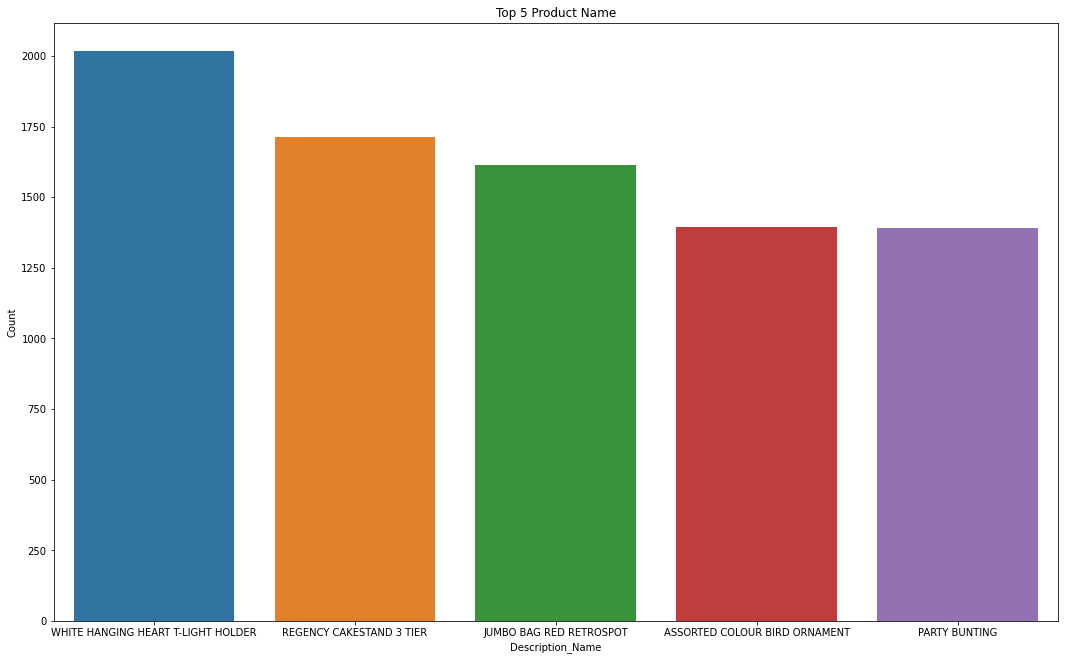

In [58]:
plt.figure(figsize=(18,11))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

##**Analysis of StockCode Variable**

In [59]:
StockCode_df=customer_df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)

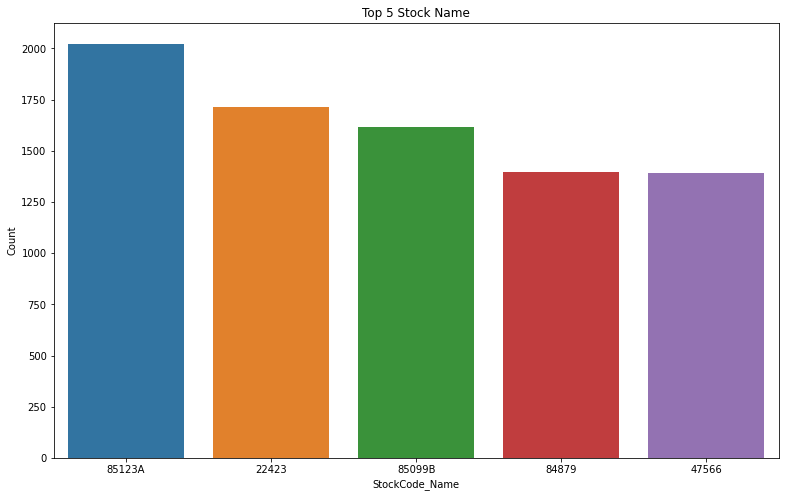

In [60]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

##**Analysis of country Variable**

In [61]:
country_df=customer_df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)

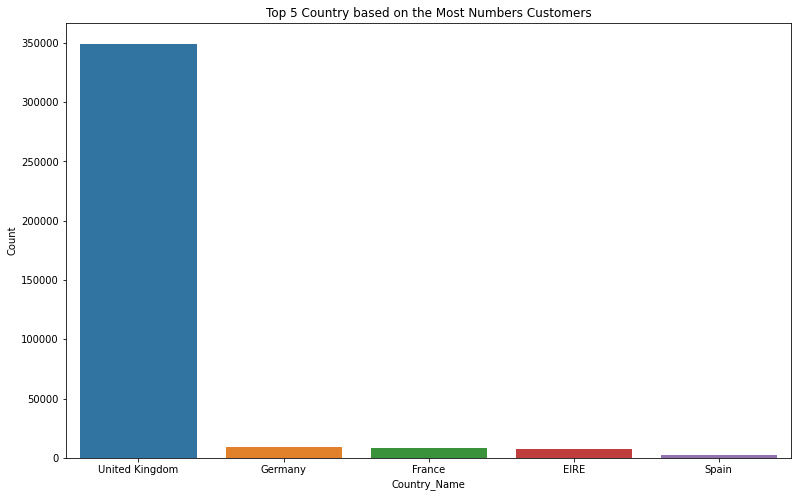

In [62]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain

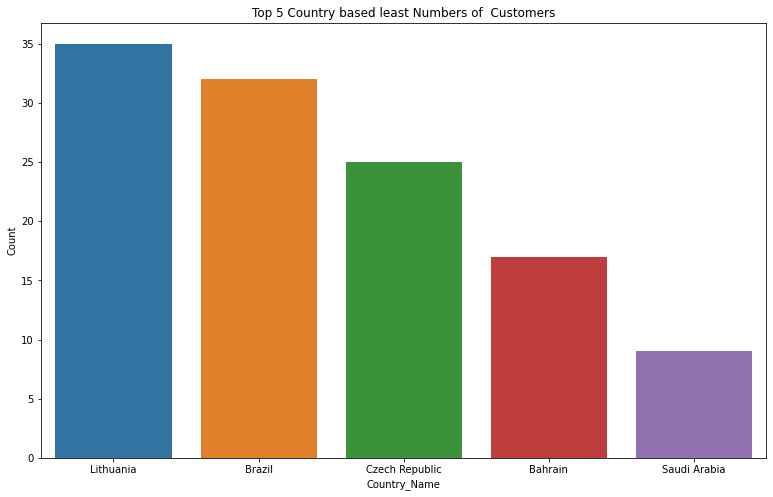

In [63]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia

##**Analysis Numeric Features**

In [66]:
numerical_columns=list(customer_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

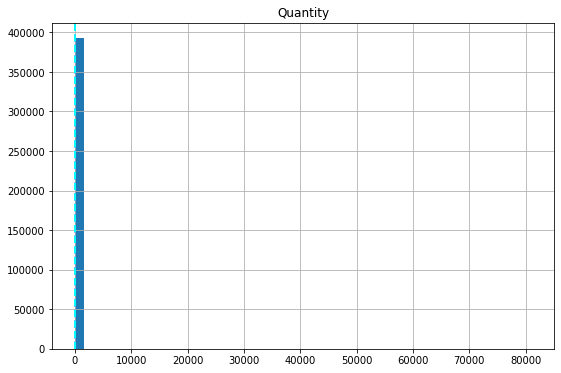

Skewness : 400.8117144489054
Kurtosis : 171772.12450262278


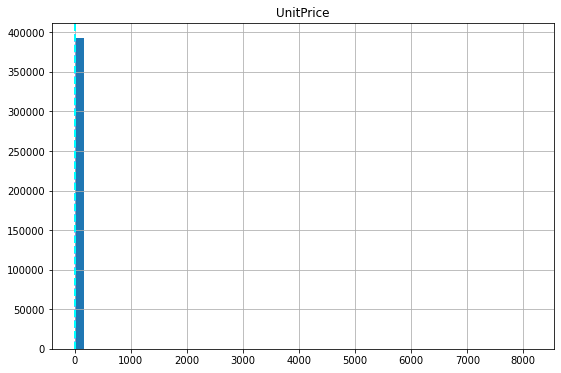

Skewness : 202.75061725718567
Kurtosis : 57403.96255594054


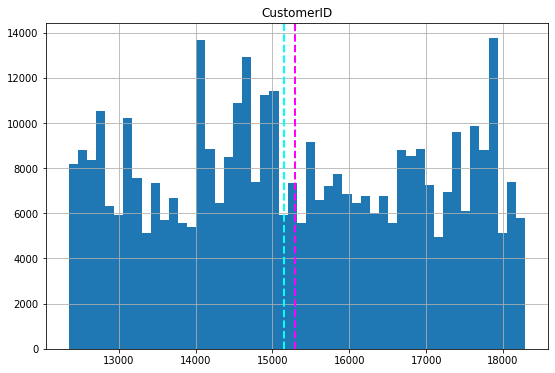

Skewness : 0.0301953601721347
Kurtosis : -1.1807001644923933


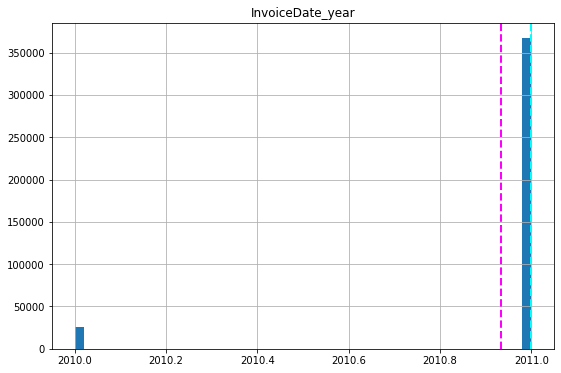

Skewness : -3.5167469285537045
Kurtosis : 10.367561756595565


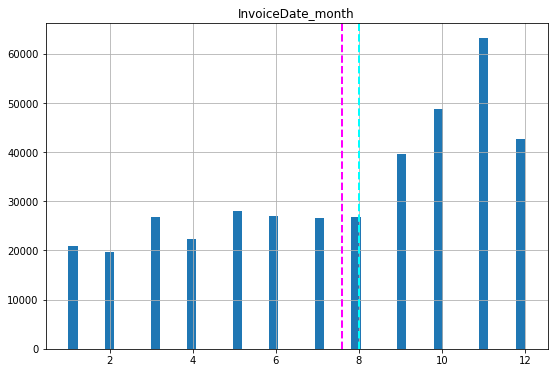

Skewness : -0.44039649840565165
Kurtosis : -1.0764781956797629


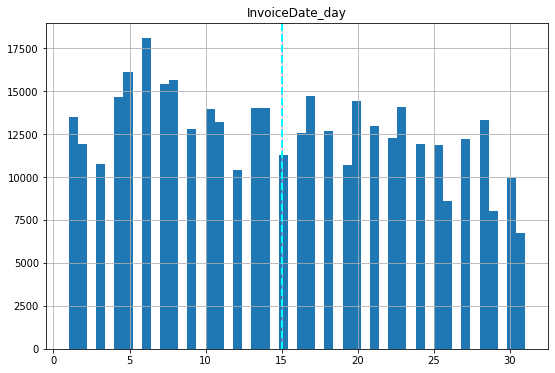

Skewness : 0.11441497180759913
Kurtosis : -1.1716768778411122


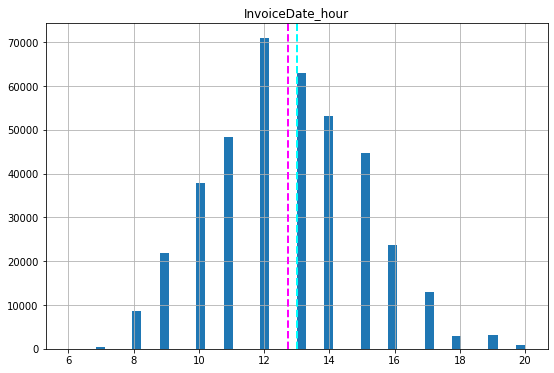

Skewness : 0.18708090962435506
Kurtosis : -0.22002250912534427


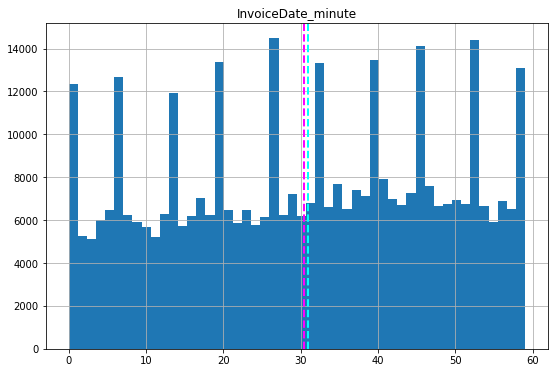

Skewness : -0.08049184573623291
Kurtosis : -1.1661140967814052


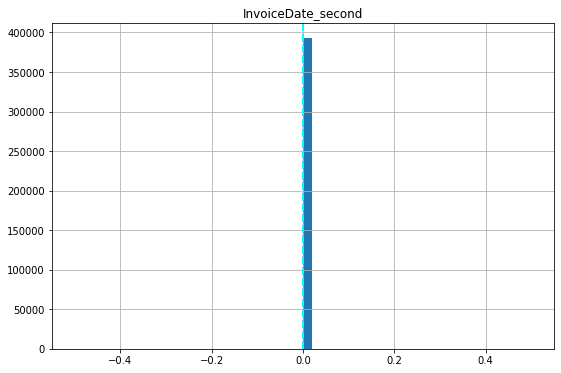

Skewness : 0
Kurtosis : 0


In [67]:
#plot a bar plot for each numerical feature count with Hist Plot 
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (customer_df[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",customer_df[col].skew())
  print( "Kurtosis :",customer_df[col].kurt())

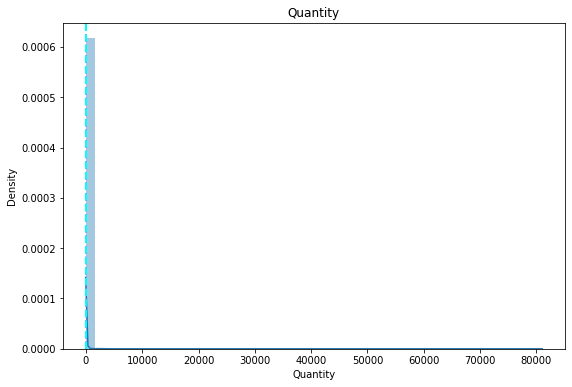

Skewness : 400.8117144489054
Kurtosis : 171772.12450262278


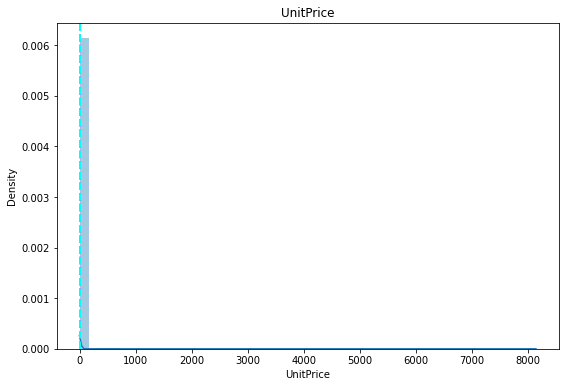

Skewness : 202.75061725718567
Kurtosis : 57403.96255594054


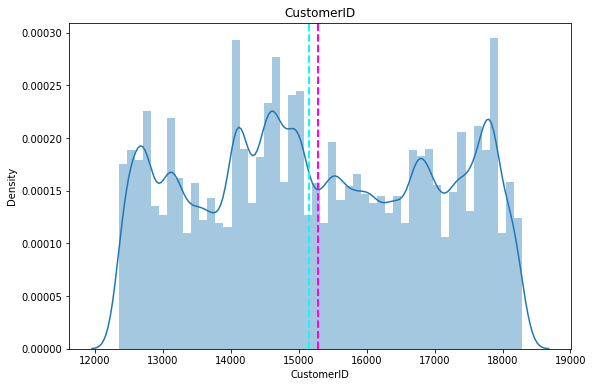

Skewness : 0.0301953601721347
Kurtosis : -1.1807001644923933


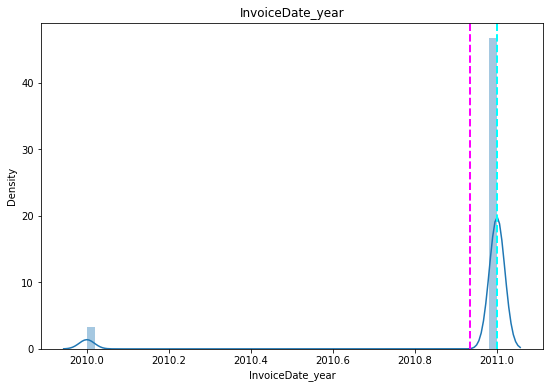

Skewness : -3.5167469285537045
Kurtosis : 10.367561756595565


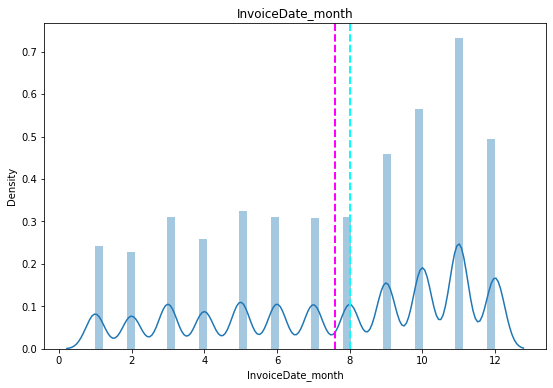

Skewness : -0.44039649840565165
Kurtosis : -1.0764781956797629


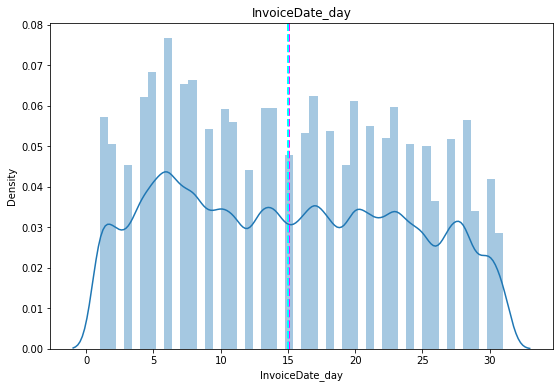

Skewness : 0.11441497180759913
Kurtosis : -1.1716768778411122


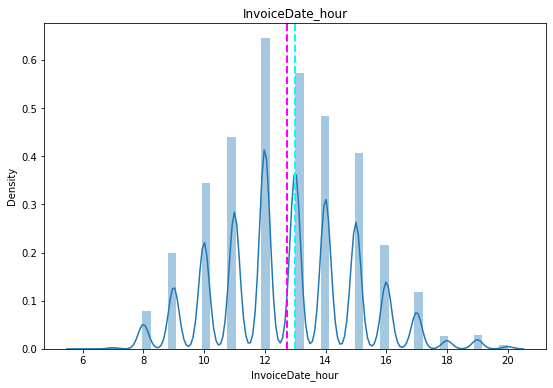

Skewness : 0.18708090962435506
Kurtosis : -0.22002250912534427


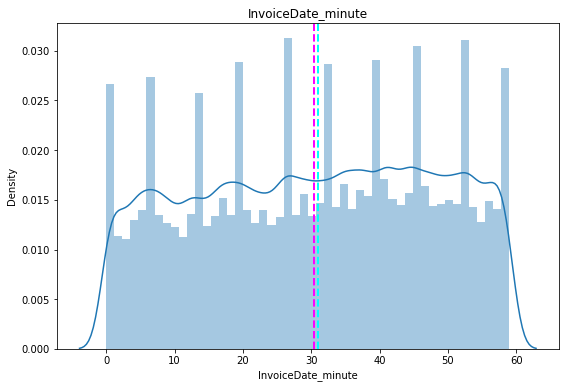

Skewness : -0.08049184573623291
Kurtosis : -1.1661140967814052


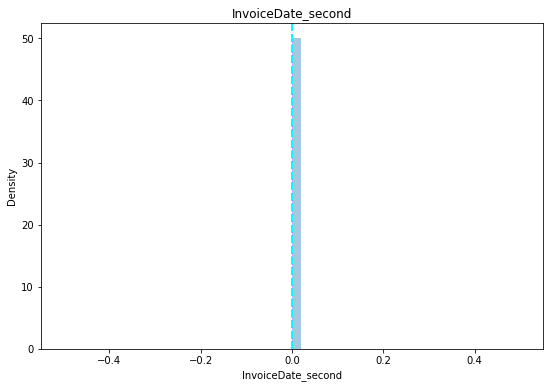

Skewness : 0
Kurtosis : 0


In [68]:
#plot a bar plot for each numerical feature count with Dist Plot
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (customer_df[col])
  sns.distplot(customer_df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",customer_df[col].skew())
  print( "Kurtosis :",customer_df[col].kurt())

# **Correlation**


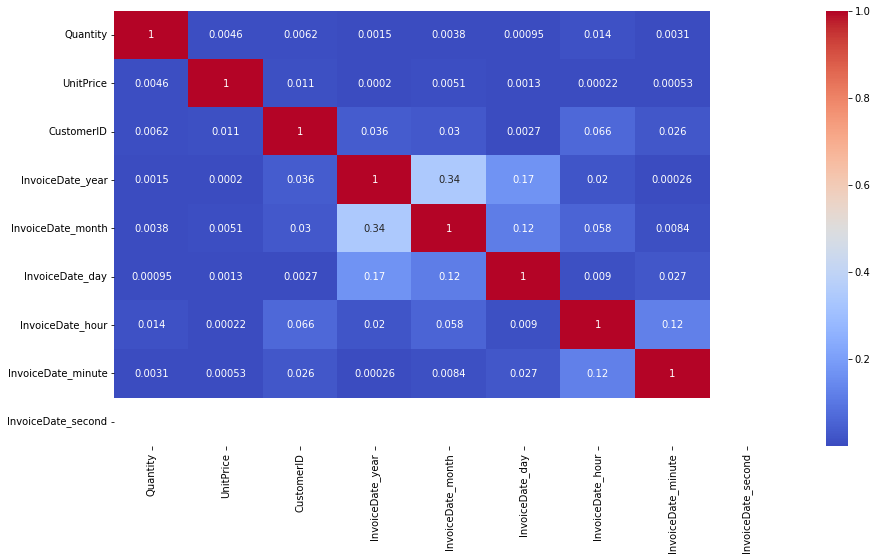

In [69]:
plt.figure(figsize=(15,8))
correlation=customer_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##**Feature engineering**
####**Create a new features Day from Invoicedate**

In [70]:
customer_df['Day']=customer_df['InvoiceDate'].dt.day_name()

####**Create a new features TotalAmount from form product of Quantity and Unitprice**

In [71]:
customer_df['TotalAmount']=customer_df['Quantity']*customer_df['UnitPrice']

In [72]:
customer_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   InvoiceDate_year  InvoiceDate_month  InvoiceDate_day  InvoiceDate_hour  \
0              2010                 12                1                 8   
1              2010                 12                1                 8   
2              2010                 12                1                 8   
3              2010                 12                1                 8   
4              2010                 12                1                 8   

   InvoiceDate_minute  InvoiceDate_second        Day  TotalAmount  
0                  26                   0  Wednesday        15.30  
1                  26                   0  Wednesday        20.34  
2                  26                   0  Wednesday        22.00  
3                  26                   0  Wednesday        20.34  
4                  26                   0  Wednesday        20.34

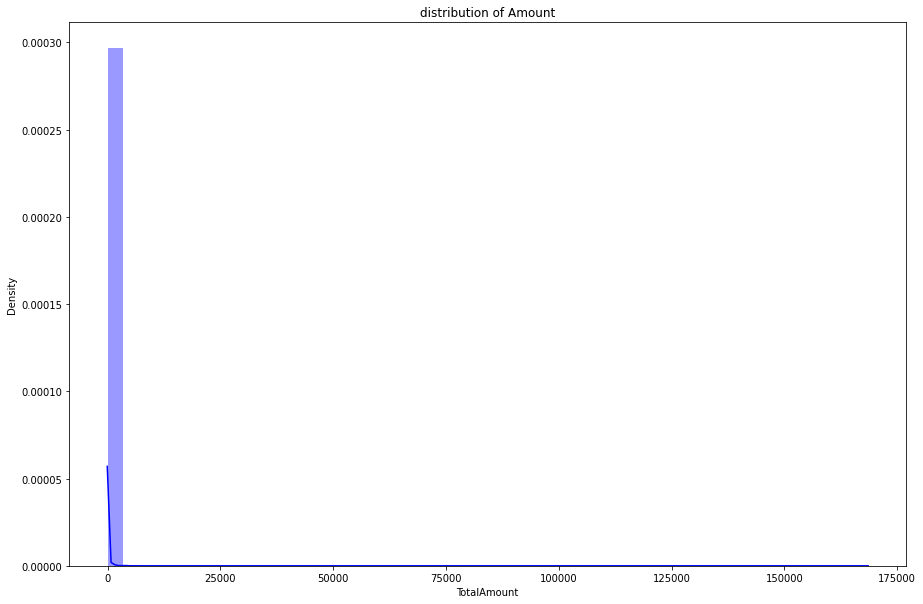

In [73]:
plt.figure(figsize=(15,10))
plt.title('distribution of Amount')
sns.distplot(customer_df['TotalAmount'],color="B")

In [74]:
customer_df['TotalAmount'].describe()

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

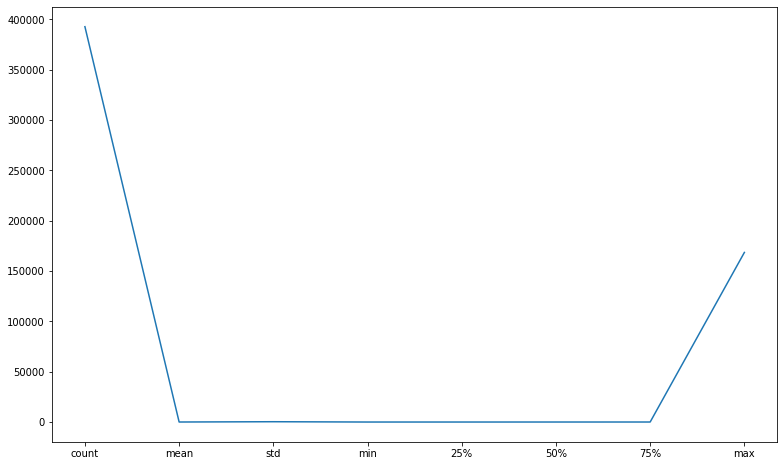

In [75]:
plt.figure(figsize=(13,8))
customer_df['TotalAmount'].describe().plot()

In [76]:
day_df=customer_df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

Day_Name  Count
0   Thursday  79260
1  Wednesday  68043
2    Tuesday  65747
3     Monday  64237
4     Sunday  61214
5     Friday  54231

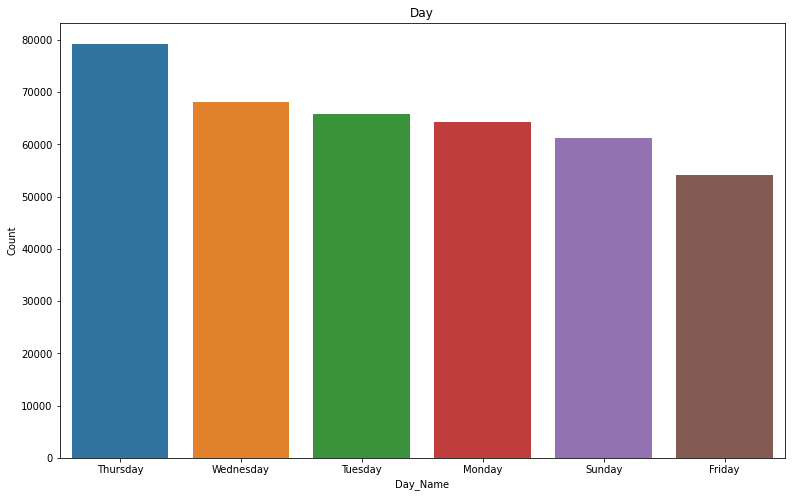

In [77]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

* Most of the customers have purches the items in Thursday ,Wednesday and Tuesday

In [78]:
month_df=customer_df['InvoiceDate_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'InvoiceDate_month': 'Count'}, inplace=True)
month_df

Month_Name  Count
0           11  63182
1           10  48796
2           12  42699
3            9  39671
4            5  28075
5            6  26926
6            3  26872
7            8  26796
8            7  26582
9            4  22435
10           1  20991
11           2  19707

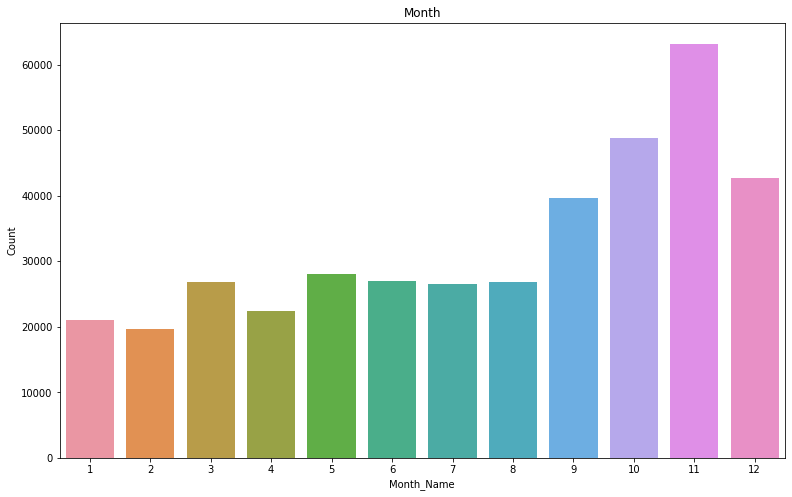

In [79]:
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

* Most numbers of customers have purches the gifts in the month of November ,October and December September

* Less numbers of customers have purches the gifts in the month of April ,january and February

In [80]:
hour_df=customer_df['InvoiceDate_hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'InvoiceDate_hour': 'Count'}, inplace=True)
hour_df

Hour_Name  Count
0          12  70942
1          13  63024
2          14  53260
3          11  48373
4          15  44793
5          10  37775
6          16  23719
7           9  21928
8          17  12942
9           8   8688
10         19   3234
11         18   2896
12         20    778
13          7    379
14          6      1

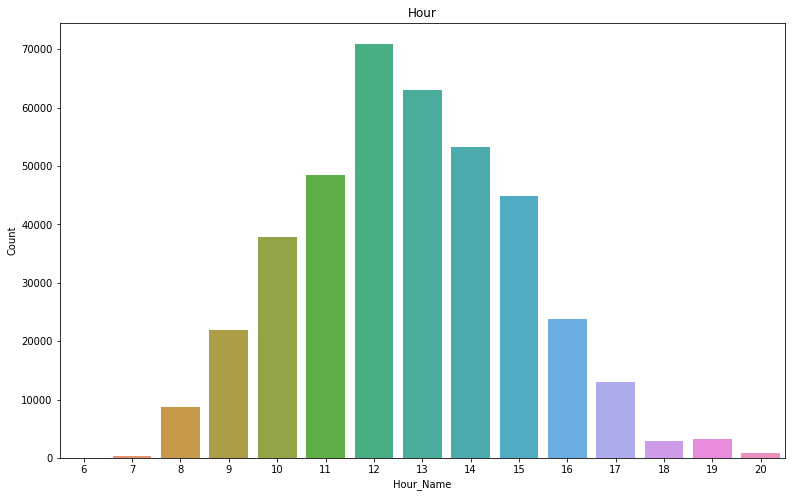

In [81]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

* From this graph we can see that in AfterNone Time most of the customers have purches the item.

In [82]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [83]:
customer_df['Time_type']=customer_df['InvoiceDate_hour'].apply(time_type)

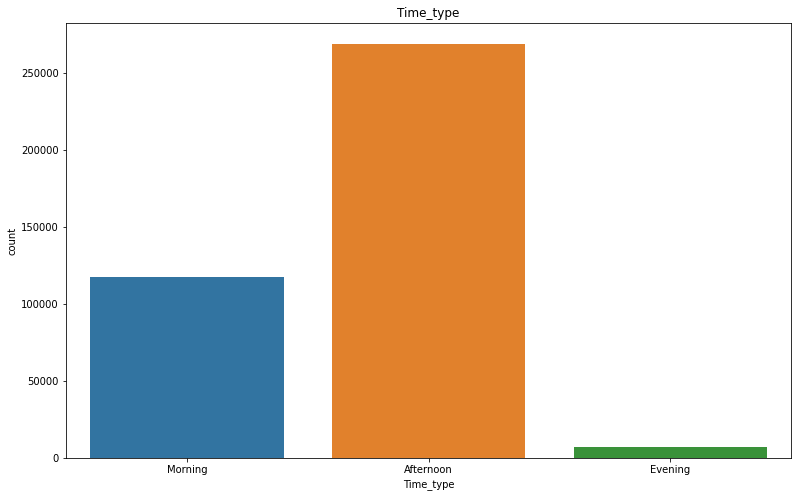

In [84]:
plt.figure(figsize=(13,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=customer_df)

* Most of the customers have purches the items in Aftrnoon ,moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening

#**Creating RFM model**
* Before applying any clustering algorithms it is always necessary to determine various quantitative factors on which the algorithm will perform segmentation. Examples of these would be features such as amount spend, activeness of the customer, their last visit, etc.

* RFM model which stands for Recency, Frequency, and Monetary is one of such steps in which we determine the recency - days to last visit, frequency - how actively the customer repurchases and monetary - total expenditure of the customer, for each customer. There are other steps too in which we divide each of these features accordingly and calculate a score for each customer. However, this approach doesnot require machine learning algorithms as segmentation can be done manually. Therefore we will skip the second step and directly use the rfm features and feed it to clustering algorithms.

* Recency = Latest Date - Last Inovice Data,
* Frequency = count of invoice no. of transaction(s),
* Monetary = Sum of Total Amount for each customer

In [85]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = customer_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [86]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

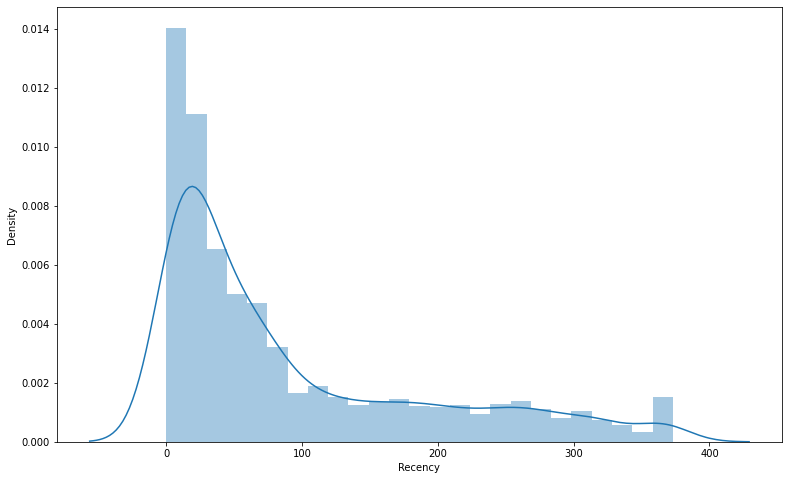

In [87]:
#Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [88]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4339.000000
mean       90.512100
std       225.515328
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

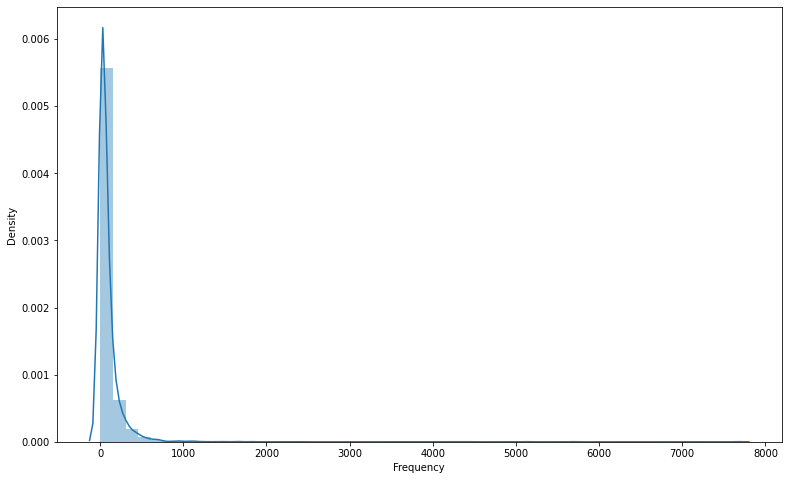

In [89]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [90]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4339.000000
mean       2048.215924
std        8984.248352
min           0.000000
25%         306.455000
50%         668.560000
75%        1660.315000
max      280206.020000
Name: Monetary, dtype: float64

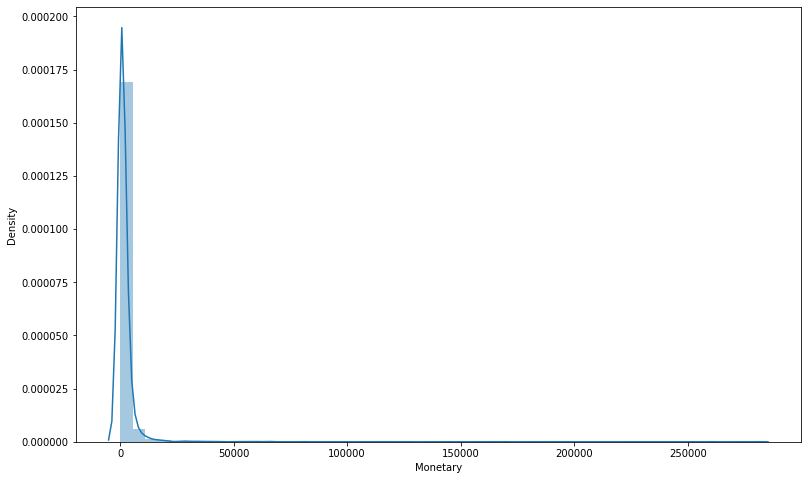

In [91]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

###**Split into four segments using quantiles**

In [92]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [93]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315}}

In [94]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [95]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [96]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

In [97]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

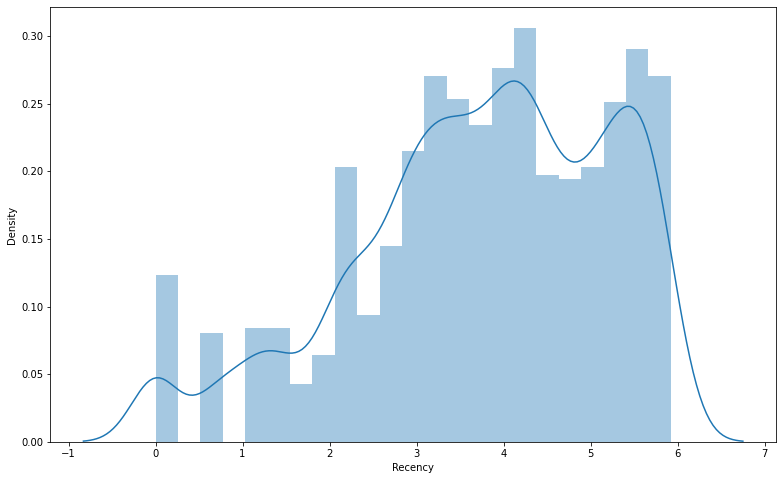

In [98]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

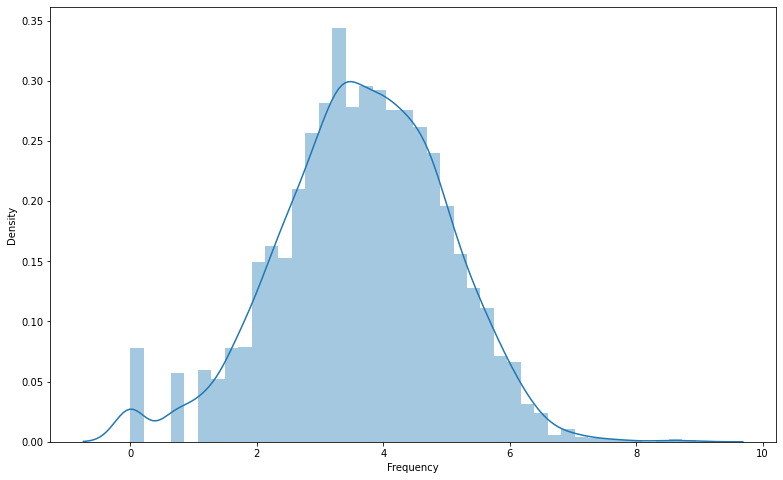

In [99]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

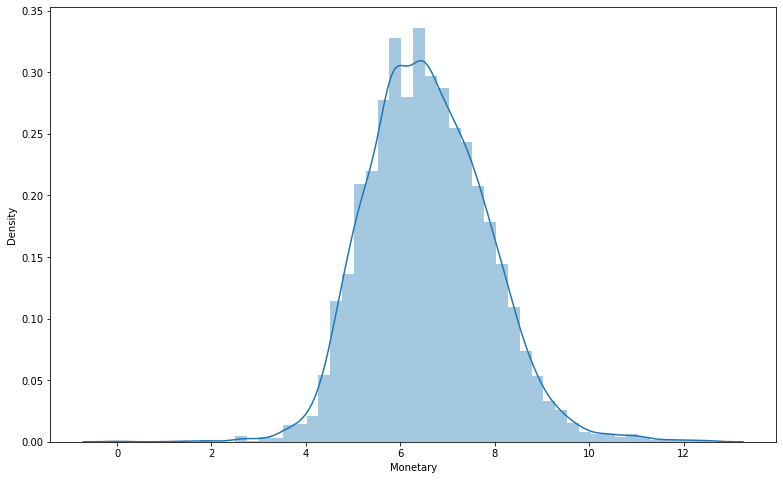

In [100]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [102]:
import math

In [103]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

#**K-Means Clustering**
###**Applying Silhouette Score Method on Recency and Monetary**

In [104]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42043960957985754
For n_clusters = 3, silhouette score is 0.3426957746633928
For n_clusters = 4, silhouette score is 0.36471364978607657
For n_clusters = 5, silhouette score is 0.3368297946025963
For n_clusters = 6, silhouette score is 0.3438114332241673
For n_clusters = 7, silhouette score is 0.3472451467513171
For n_clusters = 8, silhouette score is 0.33898947803565654
For n_clusters = 9, silhouette score is 0.34646955757929465
For n_clusters = 10, silhouette score is 0.34724964299863664
For n_clusters = 11, silhouette score is 0.3368320761044301
For n_clusters = 12, silhouette score is 0.34263274991176185
For n_clusters = 13, silhouette score is 0.3396381662771638
For n_clusters = 14, silhouette score is 0.34570870278927823
For n_clusters = 15, silhouette score is 0.33683652475724385


####**Applying Elbow Method on Recency and Monetary**

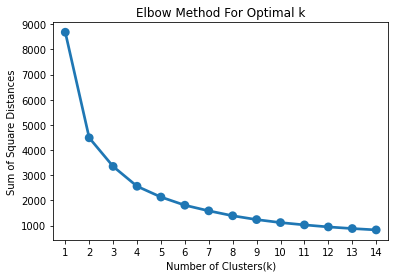

In [105]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [106]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

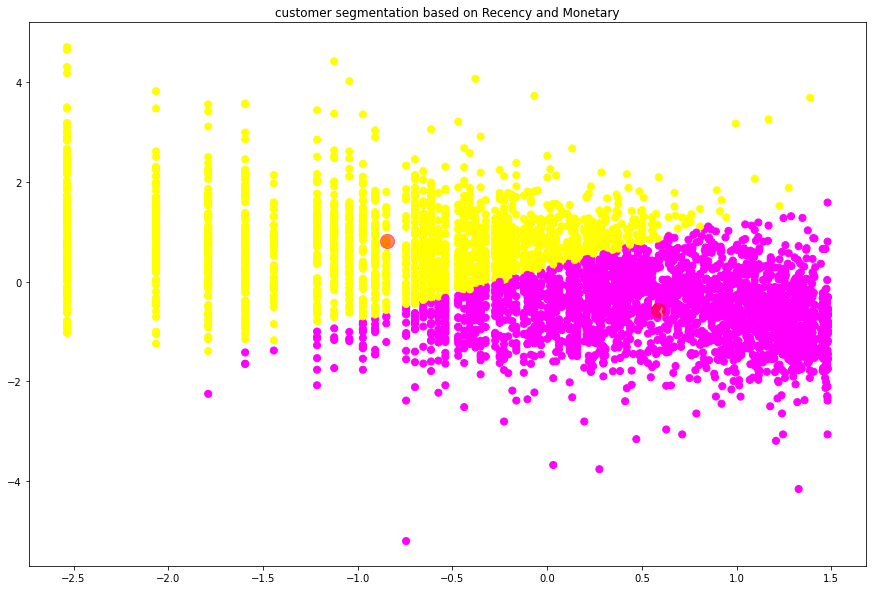

In [107]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

####**Applying DBSCAN on Recency and Monetary**

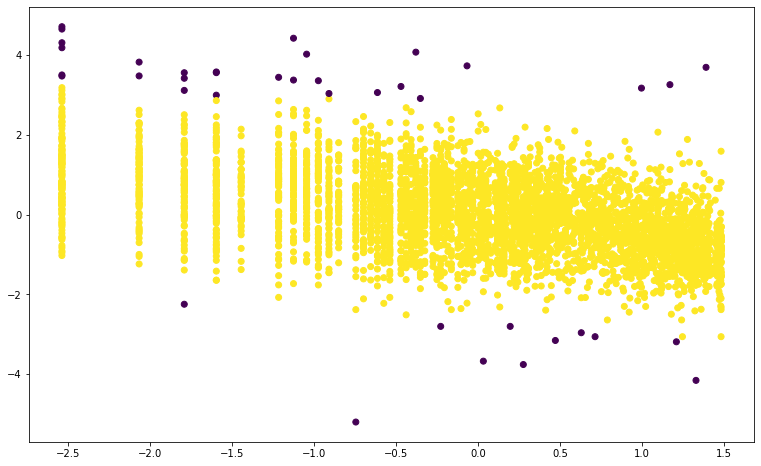

In [108]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

* we can see that ,Customers are well separate when we cluster them by Recency and Monetary

####**Applying silhouette Score Method on Frquency and Monetary**

In [109]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4784219914021605
For n_clusters = 3, silhouette score is 0.40773733472250534
For n_clusters = 4, silhouette score is 0.37224153546213795
For n_clusters = 5, silhouette score is 0.34669644901873853
For n_clusters = 6, silhouette score is 0.36121277347836767
For n_clusters = 7, silhouette score is 0.34572202182373407
For n_clusters = 8, silhouette score is 0.35279141080682974
For n_clusters = 9, silhouette score is 0.34638225384893423
For n_clusters = 10, silhouette score is 0.35956463491676544
For n_clusters = 11, silhouette score is 0.3435937837404947
For n_clusters = 12, silhouette score is 0.35443713065487253
For n_clusters = 13, silhouette score is 0.3650937046070418
For n_clusters = 14, silhouette score is 0.3526237330936337
For n_clusters = 15, silhouette score is 0.36353597141005206


####**Applying Elbow Method on Frequency and Monetary**

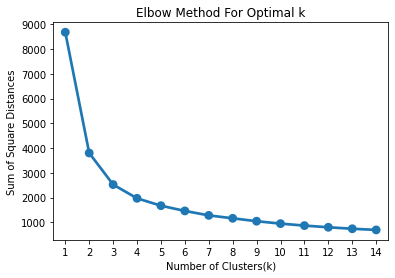

In [110]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [114]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

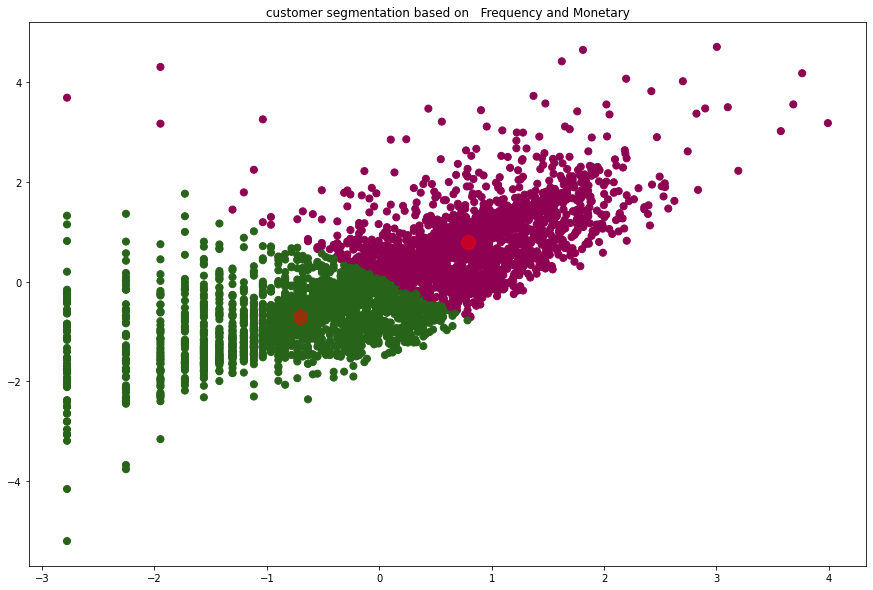

In [115]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

* we can see that ,Customers are well separate when we cluster them by Frequency and Monetary

###**Applying DBSCAN to Method on Frquency and Monetary**

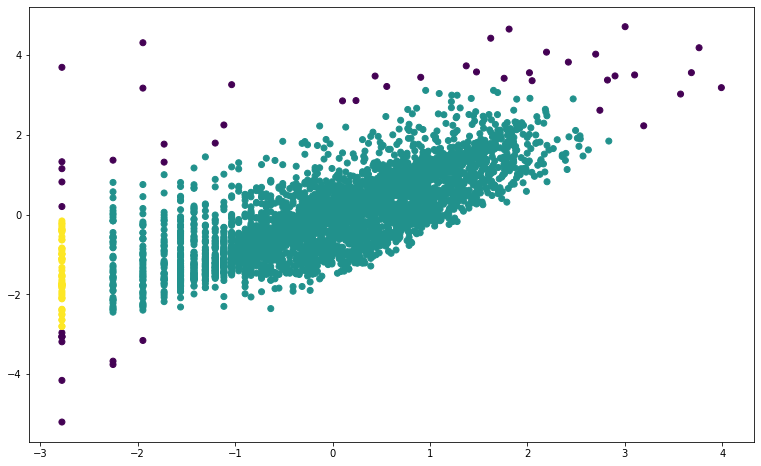

In [116]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

* we can see that ,Customers are well separate when we cluster them by Frequency and Monetary

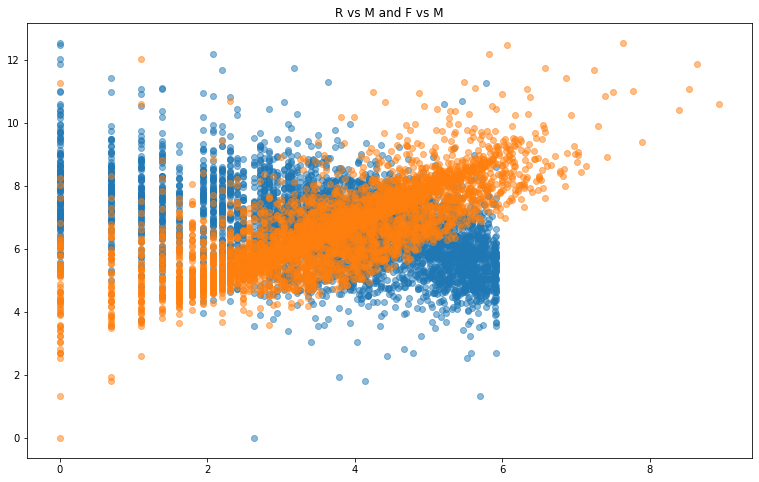

In [117]:
plt.figure(figsize=(13,8))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

###**Applying Silhouette Method on Recency ,Frequency and Monetary**

In [118]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.395588261083924
For n_clusters = 3 The average silhouette_score is : 0.3056346992700891
For n_clusters = 4 The average silhouette_score is : 0.30270317426951315
For n_clusters = 5 The average silhouette_score is : 0.2792460561657022
For n_clusters = 6 The average silhouette_score is : 0.27920490924462127
For n_clusters = 7 The average silhouette_score is : 0.26639589282641335
For n_clusters = 8 The average silhouette_score is : 0.26439181568270587
For n_clusters = 9 The average silhouette_score is : 0.2530950678302339
For n_clusters = 10 The average silhouette_score is : 0.2523587969335804
For n_clusters = 11 The average silhouette_score is : 0.26053571388536995
For n_clusters = 12 The average silhouette_score is : 0.2658660395456048
For n_clusters = 13 The average silhouette_score is : 0.2633746937000211
For n_clusters = 14 The average silhouette_score is : 0.25492771945211434
For n_clusters = 15 The average silhouette_score is : 

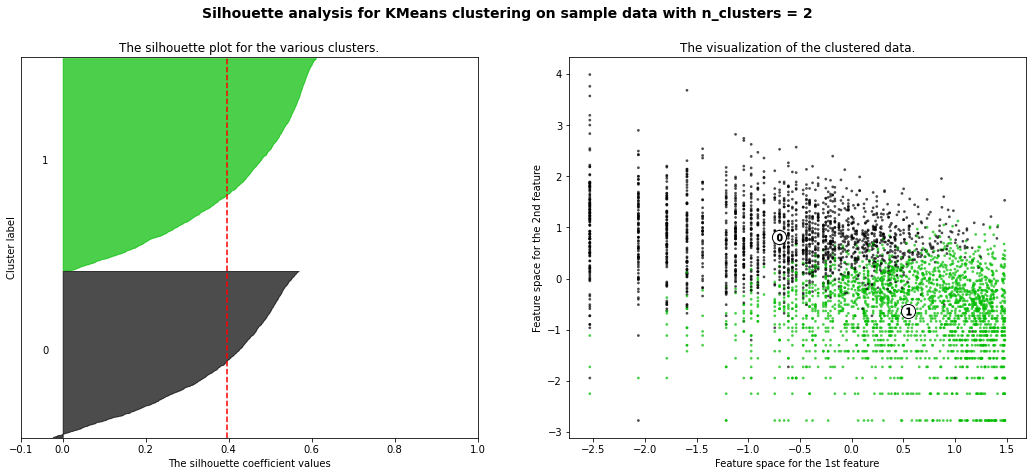

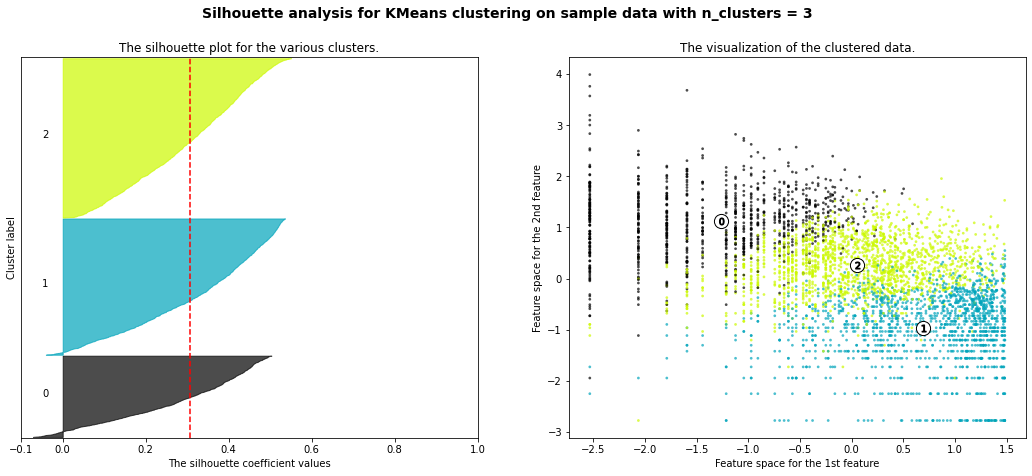

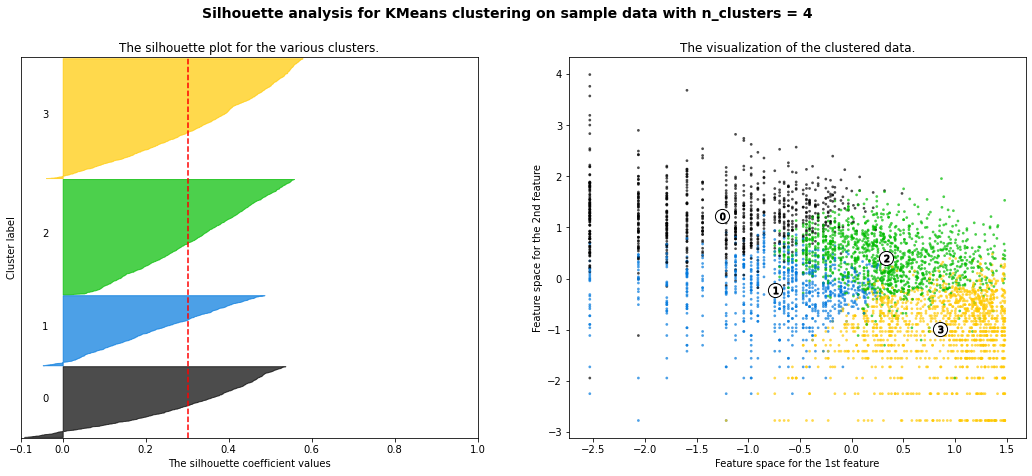

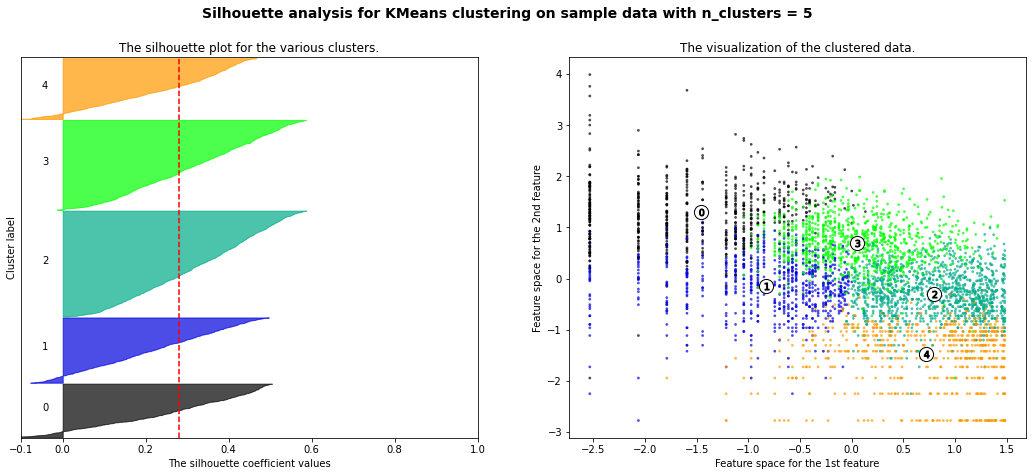

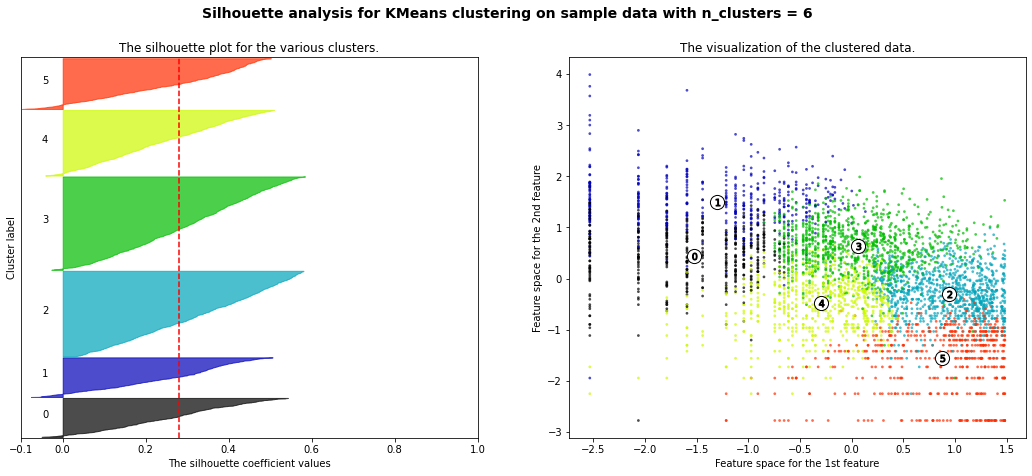

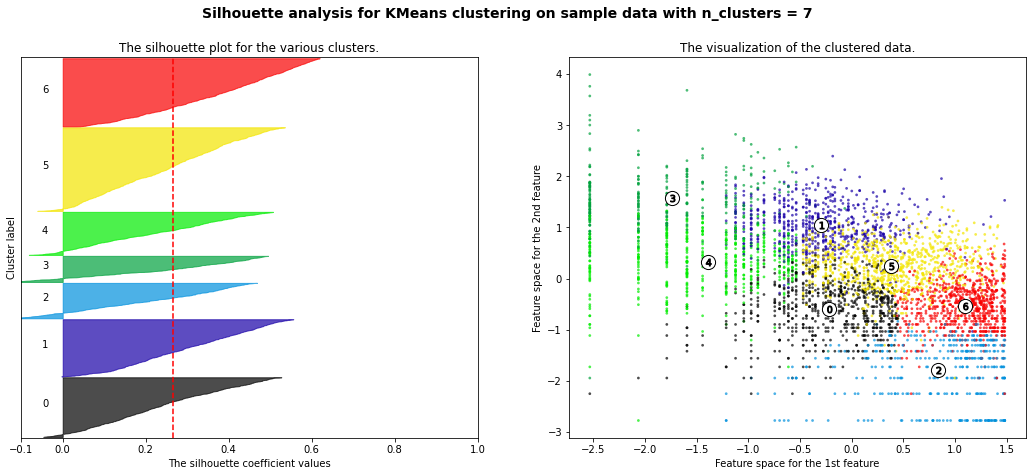

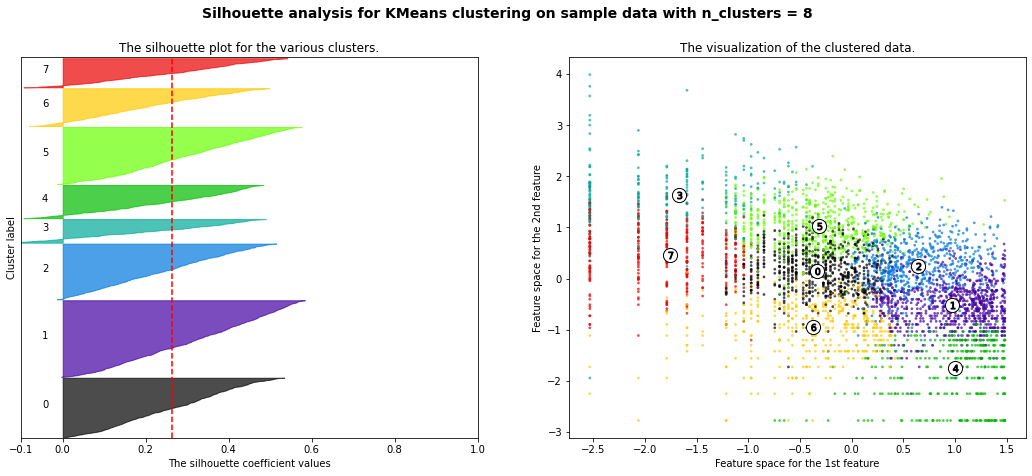

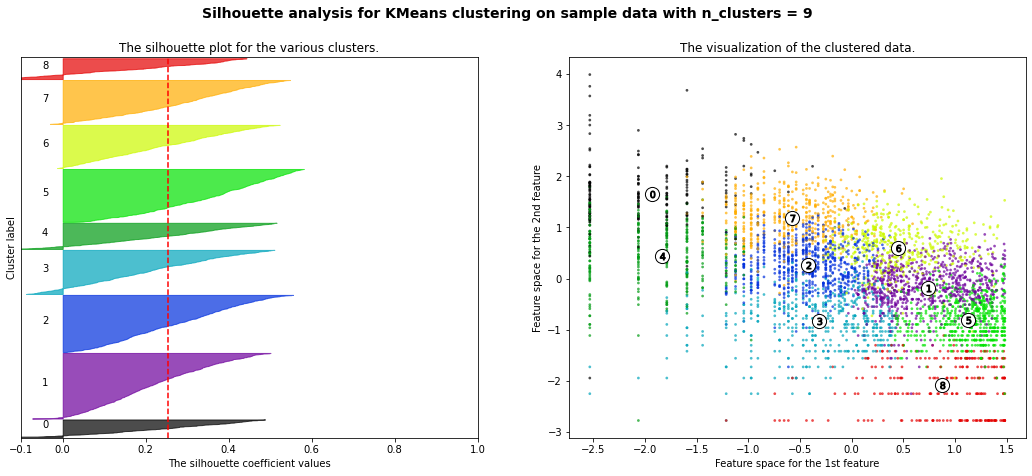

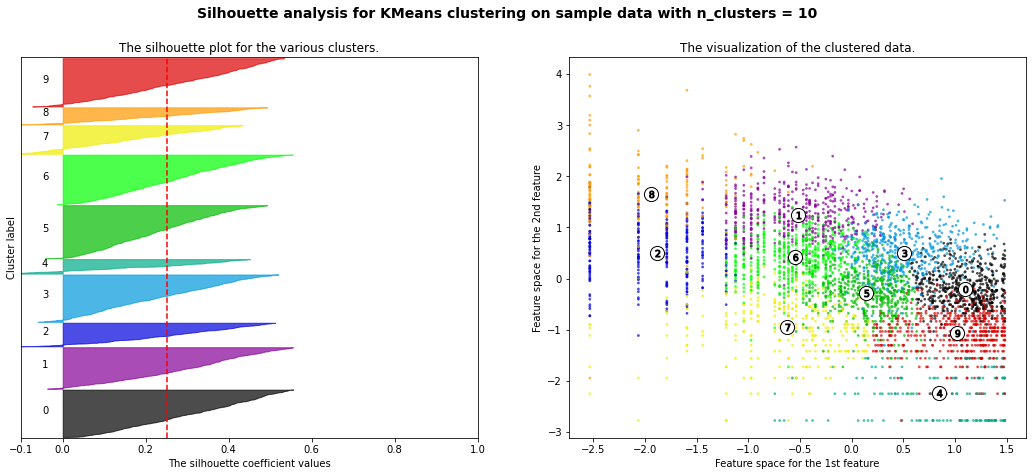

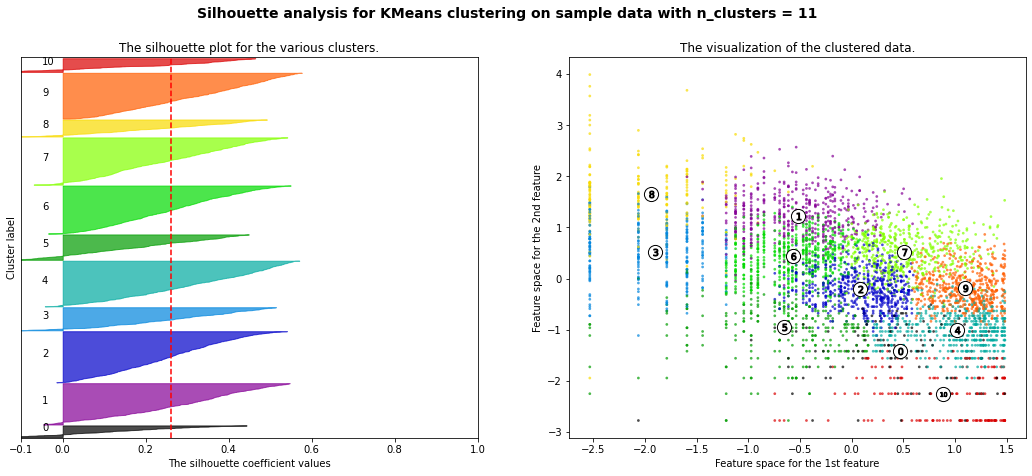

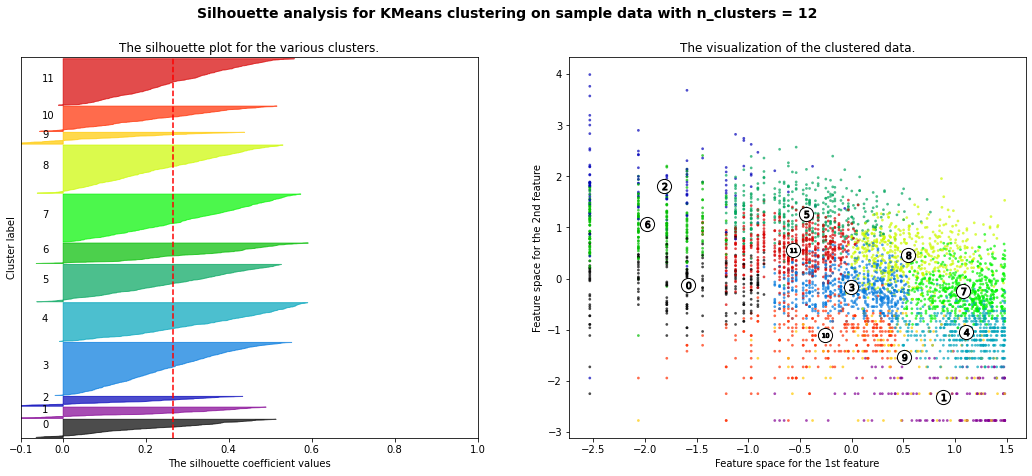

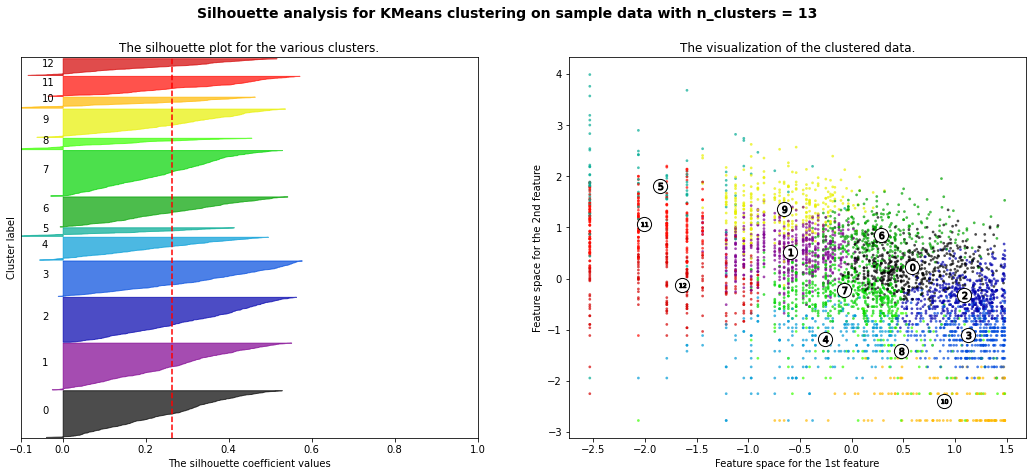

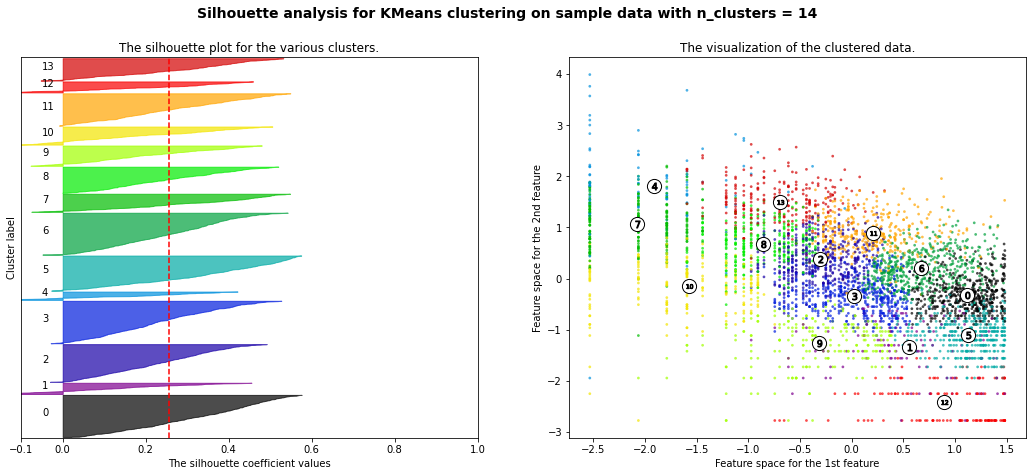

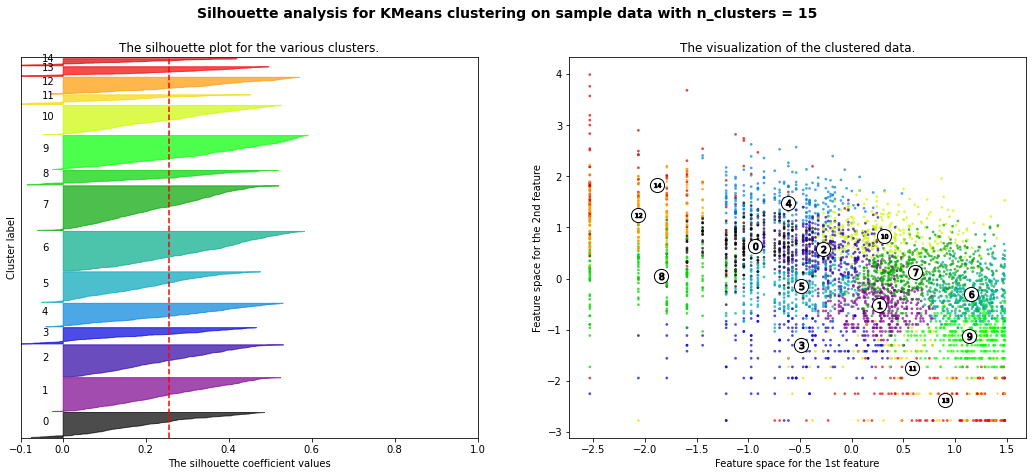

In [119]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [120]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

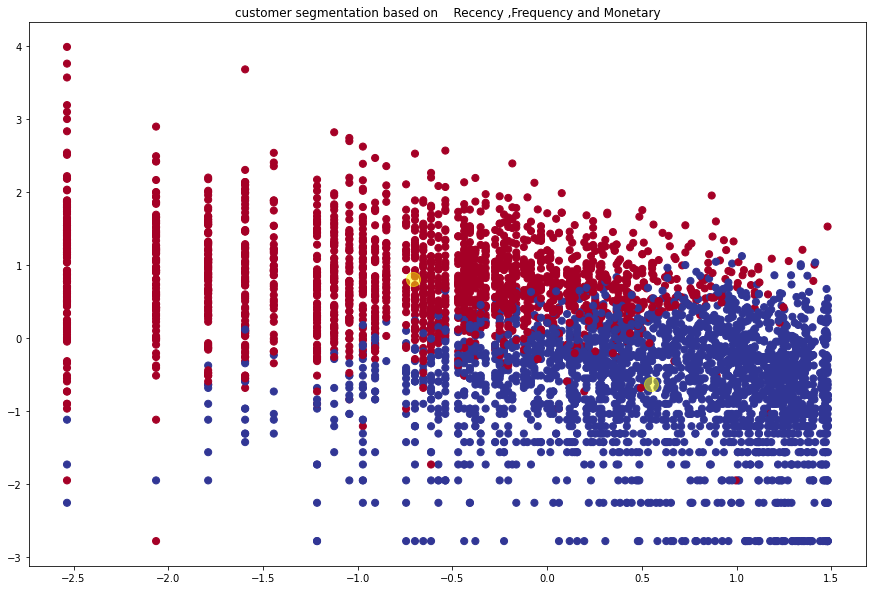

In [121]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

* we can see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary

###**Applying Elbow Method on Recency ,Frequency and Monetary**

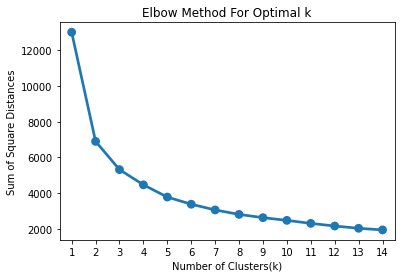

In [122]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [123]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.000000     11.253942        1  
12347.0        0.693147       5.204007      8.368693        0  
12348.0        4.317488       3.433987      7.494007        1  
12349.0        2.890372       4.290459      7.471676        0  
12350.0        5.736572       2.833213      5.812338        1  
12352.0        3.583519       4.442651      7.826459        0  
12353.0        5.318120       1.386294      4.488636        1  
12354.0        5.446737       4.060443      6.984161        1  
12355.0        5.365976       2.564949      6.129921        1  
12356.0        3.091042       4.077537      7.941449        0

###**Dendogram to find the optimal number of clusters**

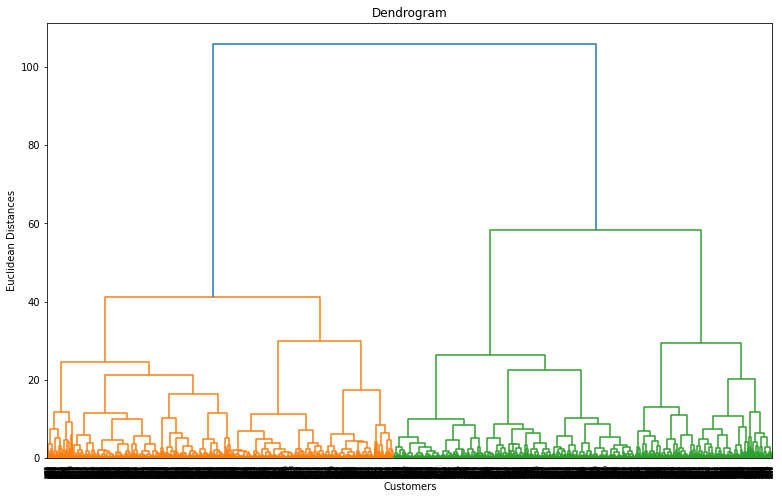

In [124]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

* The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90

* No. of Cluster = 2

In [125]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

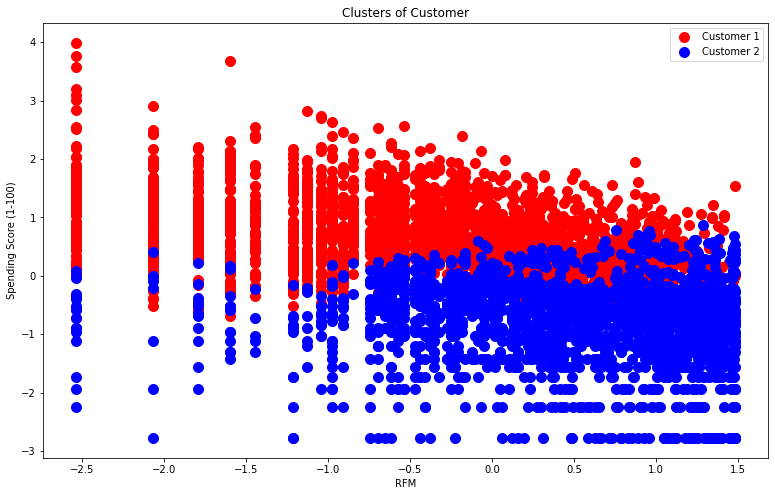

In [126]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

* By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 2

###**Applying DBSCAN to Recency ,Frequency and Monetary**

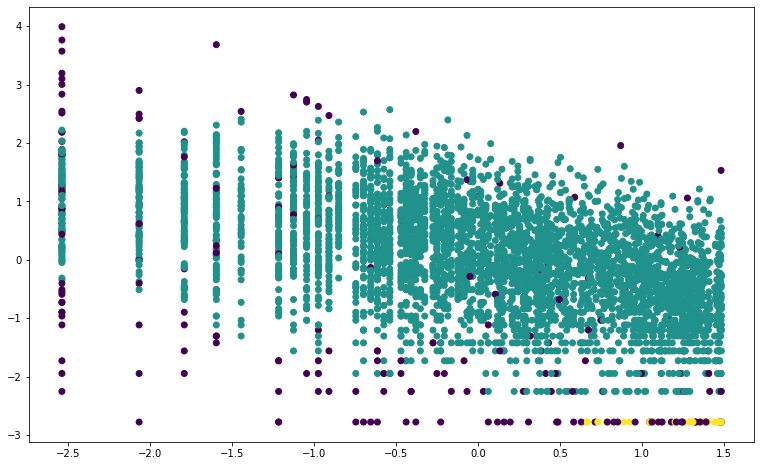

In [128]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

* we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary and optimal number of cluster is equal to 3

## **Summary**

In [129]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])
myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |   Hierarchical clustering      | RFM  |             2             |
|   10   |            DBSCAN              | RFM  |  

# **Conclusion**
* Thats it! We have come to an end of this long exercise. Throughout the analysis we went through various steps to perform customer segmentation. We started with data wrangling in which we tried to handle null values, duplicates and performed feature modifications. Next, we did some exploratory data analysis and tried to draw observations from the features we had in the dataset.

* Next, we formulated some quantitative factors such as recency, frequency and monetary known as rfm model for each of the customers. We implemented KMeans clustering algorithm on these features. We also performed silhouette and elbow method analysis to determine the optimal no. of clusters which was 2. We saw customers having high recency and low frequency and monetary values were part of one cluster and customers having low recency and high frequency, monetary values were part of another cluster.

* However, there can be more modifications on this analysis. One may choose to cluster into more no. depending on company objectives and preferences. The labelled feature after clustering can be fed into classification supervised machine learning algorithms that could predict the classes for new set of observations. The clustering can also be performed on new set of features such as type of products each customer prefer to buy often, finding out customer lifetime value (clv), segmenting on the basis of time period they visit and much more.

* As machine learning has become more of an ART, there is nothing such as right or wrong. We only try to get the best outcomes that can suit our final objectives. There is, and always will be, a need to improve, going forward.